# Introduction

In [ ]:
"""
What? Linear model: Least square, RIDGE, LASSO

Reference: [code] https://github.com/amueller/introduction_to_ml_with_python
           [book] Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly 
                  Media, 2016.
"""

# Import libraries/modules

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from matplotlib import rcParams
from sklearn.model_selection import learning_curve, KFold
rcParams['figure.figsize'] = 12, 6
rcParams['font.size'] = 15

# Create synthetic dataset

In [11]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [12]:
X, y = make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fir & plot a linear model

In [ ]:
"""
Linear models for regression can be characterized as regression models for which the prediction is a line for 
a single feature, a plane when using two features, or a hyper‐ plane in higher dimensions (that is, when using
more features).
"""

w[0]: 0.393906  b: -0.031804


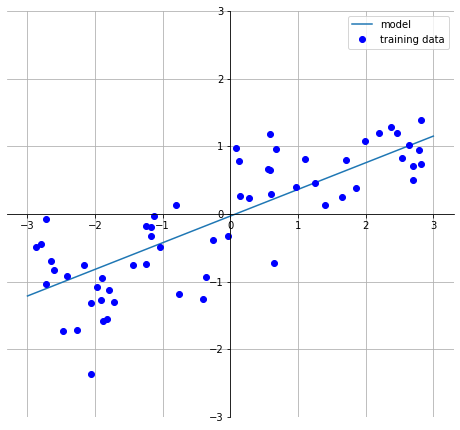

In [24]:
cm2 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
line = np.linspace(-3, 3, 100).reshape(-1, 1)

lr = LinearRegression().fit(X_train, y_train)
print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line))
plt.plot(X, y, 'bo')
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
#ax.set_xlabel("Feature")
#ax.set_ylabel("Target")
ax.legend(["model", "training data"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

# Load Boston housing dataset

In [35]:
boston = load_boston()
X = boston.data
X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
y = boston.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Linear regression aka ordinary least squares

In [ ]:
"""
Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression.
It finds the parameters w and b that minimize the mean squared error between predictions and the 
true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between
the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way
to control model complexity
"""

In [37]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
"""
The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute:
"""

In [38]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [ ]:
"""
This discrepancy between performance on the training set and the test set is a clear sign of OVERFITTING, and 
therefore we should try to find a model that allows us to con‐ trol complexity. One of the most commonly used 
alternatives to standard linear regression is RIDGE REGRESSION, which we will look into next.
"""

# Ridge regression = L2

In [ ]:
"""
In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training
data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as 
possible; in other words, all entries of w should be close to zero.

Intuitively, this means each feature should have as little effect on the outcome as possible (which translates 
to having a small slope), while still predicting well. This constraint is an example of what is called regularization.
Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge 
regression is known as L2 regularization.
"""

In [40]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [41]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [42]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [ ]:
"""
As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is 
higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is 
a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the 
training set, but better generalization. As we are only interested in generalization performance, we should 
choose the Ridge model over the LinearRegression model.
"""

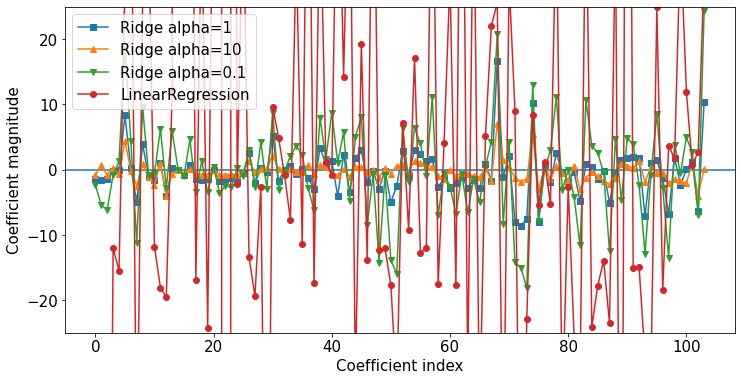

In [66]:
plt.plot(ridge.coef_, 's-', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^-', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v-', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o-', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [ ]:
"""
The graph abov will give us a more qualitative insight into how the alpha parameter changes the model by inspecting 
the coef_ attribute of models with different values of alpha. The optimum setting of alpha depends on the particular
dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set 
performance but might help generalization.
"""

## Another way to analyse the difference via learning curve

In [ ]:
"""
Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of 
training data available. We subsampled the Boston Housing dataset and evaluated LinearRegression
and Ridge(alpha=1) on subsets of increasing size (plots that show model performance as a function of dataset size
are called learning curves).
"""

In [77]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', lw = 3,
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', lw =3,
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)

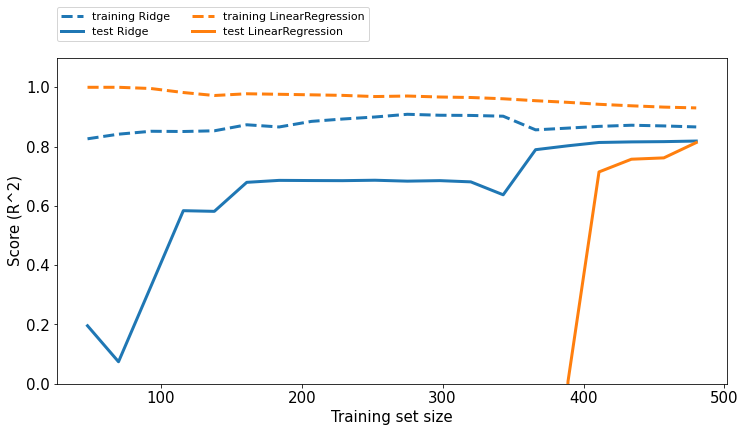

In [78]:
plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

In [ ]:
"""
As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and 
linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for
linear regression across the board. However, the test score for ridge is better, particularly for small subsets of
the data.
"""

## Take home message

In [ ]:
"""
The lesson here is that with enough training data, regularization becomes less important, and given enough data, 
ridge and linear regression will have the same performance (the fact that this happens here when using the full 
dataset is just by chance).

Another interesting aspect is the decrease in training performance for linear regression. If more data is added, 
it becomes harder for a model to overfit, or memorize the data.
""" 

# LASSO = L1

In [ ]:
"""
The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means 
some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. 
Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important
features of your model.
"""

In [81]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [80]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [82]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

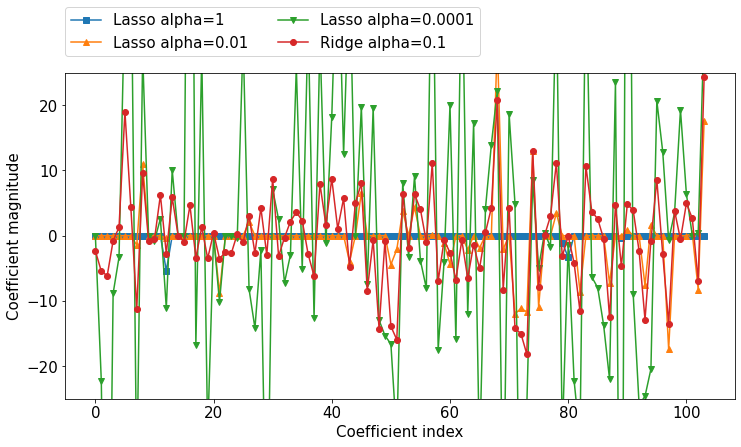

In [84]:
plt.plot(lasso.coef_, 's-', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^-', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v-', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o-', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [ ]:
"""
For alpha=1, we not only see that most of the coefficients are zero (which we already knew), but that the remaining
coefficients are also small in magnitude. Decreasing alpha to 0.01, we obtain the solution shown as the green dots,
which causes most features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregu‐ larized, 
with most coefficients nonzero and of large magnitude.
"""

## RIDGE vs. LASSO in practice

In [ ]:
"""
In practice, ridge regression is usually the first choice between these two models. However, if you have a large
amount of features and expect only a few of them to be important, Lasso might be a better choice. 
ElasticNet combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price
of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.
"""